# Using dominant colors to determine genre

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
from matplotlib import image
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans
from timeit import default_timer as timer

def get_dominant_color(id):
    start = timer()
    img = image.imread(r'../Data/Images/' + str(id) + '.jpg')
    np_img = np.reshape(img, (img.shape[0]*img.shape[1], img.shape[2]))
    np_flat_img = whiten(np_img)
    cluster_centers, distortion = kmeans(np_flat_img, 2)
    
    results = {}
    for index, cluster_center in enumerate(cluster_centers):
        int_color = int('{:02x}{:02x}{:02x}'.format(
            int(cluster_center[0] * red_std), 
            int(cluster_center[1] * green_std), 
            int(cluster_center[2] * blue_std)), 16)
        key = 'color_{}'.format(index)
        results[key] = int_color
    end = timer()
    print('{0}: {1:.2f}s'.format(id, end - start))
    return results
    

In [113]:
result

{'color_0': 14803398, 'color_1': 4274226}

In [116]:
get_dominant_color(25)

25: 0.92s


{'color_0': 5459000, 'color_1': 14803398}

In [119]:
movies = pd.read_csv(r'../Data/movies_df.csv', index_col=0)

In [117]:
temp = movies[:50].apply(lambda x: get_dominant_color(x['id']), axis=1, result_type='expand')

299537: 1.70s
166428: 2.45s
399579: 2.56s
450001: 1.55s
338952: 1.55s
324857: 1.33s
400650: 2.00s
464504: 1.06s
297802: 1.95s
512196: 0.84s
450465: 1.31s
490132: 1.62s
428078: 1.08s
299536: 1.93s
920: 2.50s
487297: 1.21s
280217: 4.03s
480530: 1.75s
424694: 1.45s
449563: 1.66s
390634: 2.13s
245891: 2.05s
458723: 1.03s
445629: 1.49s
332562: 1.55s
404368: 3.44s
10528: 1.22s
429197: 0.74s
438650: 1.22s
490033: 1.55s
335983: 1.14s
452832: 1.73s
504172: 1.03s
491418: 1.81s
375588: 1.43s
337167: 1.31s
543103: 2.03s
400157: 1.64s
375262: 1.15s
122917: 1.25s
399402: 0.99s
118340: 1.51s
284054: 2.08s
443055: 1.21s
671: 1.71s
474214: 1.54s
522681: 1.14s
24428: 1.41s
220882: 1.63s
438799: 0.90s


In [120]:
df = pd.merge(movies, temp, left_index=True, right_index=True, )

In [121]:
df.head()

,id,title,release_date,poster_path,Mystery,Animation,Music,History,Comedy,Science Fiction,...,Documentary,TV Movie,Adventure,Drama,Western,Thriller,Action,Crime,color_0,color_1
0,299537,Captain Marvel,2019-03-06,/AtsgWhDnHTq68L0lLsUrCnM7TjG.jpg,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,3019803,7040104
1,166428,How to Train Your Dragon: The Hidden World,2019-01-03,/xvx4Yhf0DVH8G4LzNISpMfFBDy2.jpg,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,5534079,1383983
2,399579,Alita: Battle Angel,2019-01-31,/xRWht48C2V8XNfzvPehyClOvDni.jpg,0,0,0,0,0,1,...,0,0,1,0,0,1,1,0,926774,5928322
3,450001,Master Z: Ip Man Legacy,2018-12-20,/2WfjB6FUDTIBVI2y02UGbnHR82s.jpg,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,920845,6250844
4,338952,Fantastic Beasts: The Crimes of Grindelwald,2018-11-14,/fMMrl8fD9gRCFJvsx0SuFwkEOop.jpg,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,7106930,1185562


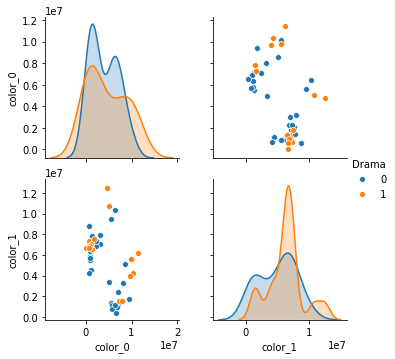

In [137]:
sns.pairplot(df, vars=['color_0', 'color_1'], hue='Drama')

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
df.columns

Index(['id', 'title', 'release_date', 'poster_path', 'Mystery', 'Animation',
       'Music', 'History', 'Comedy', 'Science Fiction', 'Family', 'Fantasy',
       'Romance', 'Horror', 'War', 'Documentary', 'TV Movie', 'Adventure',
       'Drama', 'Western', 'Thriller', 'Action', 'Crime', 'color_0',
       'color_1'],
      dtype='object')

In [127]:
df.describe()

,id,Mystery,Animation,Music,History,Comedy,Science Fiction,Family,Fantasy,Romance,...,Documentary,TV Movie,Adventure,Drama,Western,Thriller,Action,Crime,color_0,color_1
count,50.00000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,...,50.0,50.0,50.000000,50.000000,50.0,50.000000,50.000000,50.000000,5.000000e+01,5.000000e+01
mean,359145.56000,0.100000,0.14000,0.040000,0.040000,0.320000,0.280000,0.160000,0.30000,0.080000,...,0.0,0.0,0.400000,0.320000,0.0,0.260000,0.460000,0.060000,4.233623e+06,5.435790e+06
std,143319.00047,0.303046,0.35051,0.197949,0.197949,0.471212,0.453557,0.370328,0.46291,0.274048,...,0.0,0.0,0.494872,0.471212,0.0,0.443087,0.503457,0.239898,3.376923e+06,2.904052e+06
min,671.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000e+00,3.281940e+05
25%,299536.25000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.021404e+06,3.303852e+06
50%,400403.50000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.086405e+06,6.210394e+06
75%,452240.25000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,1.00000,0.000000,...,0.0,0.0,1.000000,1.000000,0.0,0.750000,1.000000,0.000000,7.055717e+06,7.188918e+06
max,543103.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.143532e+07,1.250015e+07


In [148]:
y = df[['Action']]
X = df[['color_0', 'color_1']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [153]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
model = OneVsRestClassifier(SVC(gamma='auto'))
model.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=None)

In [155]:
predictions = model.predict(X_test)

In [157]:
from sklearn.metrics import confusion_matrix, classification_report

In [158]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.53      1.00      0.70         8
           1       0.00      0.00      0.00         7

   micro avg       0.53      0.53      0.53        15
   macro avg       0.27      0.50      0.35        15
weighted avg       0.28      0.53      0.37        15



/home/christoph/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/christoph/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/christoph/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
